In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [2]:
data = load_files("BBC/", encoding="latin-1", decode_error="replace")

In [3]:
labels, counts = np.unique(data.target, return_counts=True)

In [4]:
labels_str = np.array(data.target_names)[labels]
class_dict=dict(zip(labels_str, counts))

print(class_dict)

{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}


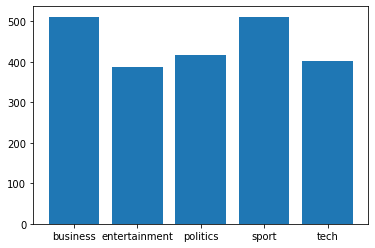

In [5]:
plt.bar(labels_str, counts)
plt.savefig(" bbc-distribution.pdf")

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state=None)

# MultinomialNB default values, try 1

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(analyzer='word', stop_words="english", decode_error="ignore")
corpus = vectorizer.fit_transform(x_train)
cls = MultinomialNB()
cls.fit(vectorizer.transform(x_train), y_train)

MultinomialNB()

In [8]:
class_props = ""
class_instances = [0,0,0,0,0]

for i in y_train:
    if (i==0):
        class_instances[0]+=1;
    elif (i==1):
        class_instances[1]+=1
    elif (i==2):
        class_instances[2]+=1
    elif (i==3):
        class_instances[3]+=1
    elif (i==4):
        class_instances[4]+=1
        
for i in range(len(class_instances)):
    class_instances[i] = '{0:.5g}'.format(100*class_instances[i]/len(y_train))
    class_props += "Prior probability of " + labels_str[i] + ": " + class_instances[i] + "%\n"

In [9]:
import pandas as pd

counts = pd.DataFrame(corpus.toarray(), index=y_train, columns=vectorizer.get_feature_names())
class_classification = []
class_word_ctr = [0,0,0,0,0]


for i in range(5):
    class_classification.append(counts.loc[counts.index==i].sum(axis=0))
    for j in class_classification[i]:
        class_word_ctr[i] += class_classification[i][j]
        
class_word_tokens = ""

for i in range(5):
    class_word_tokens += "The number of word-tokens in " + labels_str[i] + ": " + str(class_word_ctr[i]) + "\n" 
class_word_tokens += "\nThe number of word-tokens in the entire corpus is: " + str(np.sum(class_word_ctr)) + "\n"

In [10]:
zero_freq_words_ctr = [0,0,0,0,0]
one_freq_words_ctr = 0

for i in range(5):
    for j in class_classification[i]:
        if class_classification[i][j]==0:
            zero_freq_words_ctr[i] += 1
        if class_classification[i][j]==1:
            one_freq_words_ctr += 1
            
zero_freq_words_per = ['{0:.3f}'.format(100*zero_freq_words_ctr[i]/class_word_ctr[i]) for i in range(5)]
one_freq_words_per = '{0:.3f}'.format(100*one_freq_words_ctr/np.sum(class_word_ctr))

words_number_and_per_str = ""

for i in range(5):
    words_number_and_per_str += "The number and percentage of words with a frequency of zero in " + labels_str[i] + ": Number-> " + str(zero_freq_words_ctr[i]) + "\tPercentage-> " + str(zero_freq_words_per[i]) + "%\n"
    
words_number_and_per_str += "\nThe number and percentage of words with a frequency of one in the entire corpus is: Number-> " + str(one_freq_words_ctr) + "\tPercentage-> " + str(one_freq_words_per) + "%\n"

In [11]:
import math

word_list = vectorizer.get_feature_names();    
count_list = corpus.toarray().sum(axis=0)
corpus_dict = dict(zip(word_list,count_list))

prog_prop = '{0:.3f}'.format(math.log(corpus_dict['programming']/np.sum(class_word_ctr)))

food_prop = '{0:.3f}'.format(math.log(corpus_dict['food']/np.sum(class_word_ctr)))

fav_words_str = "The log-prop of Programming is: " + prog_prop + "\nThe log-prop of Food is: " + food_prop


In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

y_pred = cls.predict(vectorizer.transform(x_test))
with open("bbc-performance.txt", "a") as myfile:
    myfile.write("********************************************************\nMultinomialNB default values, try 1\n\n")
    myfile.write("\nb)\nConfusion Matrix:\n\n" + str(confusion_matrix(y_test, y_pred)))
    myfile.write("\n\nc & d)\nAccuracy:\t" + str(accuracy_score(y_test, y_pred)))
    myfile.write("\n\n" + str(classification_report(y_test, y_pred, target_names=data.target_names)))
    myfile.write("\n\ne)\n" + class_props)
    myfile.write("\n\nf)\nThe size of the vocabulary: " + str(len(corpus_dict)))
    myfile.write("\n\ng & h)\n" + class_word_tokens)
    myfile.write("\n\ni & j)\n" + words_number_and_per_str)
    myfile.write("\n\nk)\n" + fav_words_str)

# MultinomialNB default values, try 2

In [13]:
vectorizer = CountVectorizer(analyzer='word', stop_words="english", decode_error="ignore")
corpus = vectorizer.fit_transform(x_train)
cls = MultinomialNB()
cls.fit(vectorizer.transform(x_train), y_train)

class_props = ""
class_instances = [0,0,0,0,0]

for i in y_train:
    if (i==0):
        class_instances[0]+=1;
    elif (i==1):
        class_instances[1]+=1
    elif (i==2):
        class_instances[2]+=1
    elif (i==3):
        class_instances[3]+=1
    elif (i==4):
        class_instances[4]+=1
        
for i in range(len(class_instances)):
    class_instances[i] = '{0:.5g}'.format(100*class_instances[i]/len(y_train))
    class_props += "Prior probability of " + labels_str[i] + ": " + class_instances[i] + "%\n"

counts = pd.DataFrame(corpus.toarray(), index=y_train, columns=vectorizer.get_feature_names())

class_classification = []
class_word_ctr = [0,0,0,0,0]
for i in range(5):
    class_classification.append(counts.loc[counts.index==i].sum(axis=0))
    for j in class_classification[i]:
        class_word_ctr[i] += class_classification[i][j]

class_word_tokens = ""

for i in range(5):
    class_word_tokens += "The number of word-tokens in " + labels_str[i] + ": " + str(class_word_ctr[i]) + "\n" 
class_word_tokens += "\nThe number of word-tokens in the entire corpus is: " + str(np.sum(class_word_ctr)) + "\n"

zero_freq_words_ctr = [0,0,0,0,0]
one_freq_words_ctr = 0

for i in range(5):
    for j in class_classification[i]:
        if class_classification[i][j]==0:
            zero_freq_words_ctr[i] += 1
        if class_classification[i][j]==1:
            one_freq_words_ctr += 1
            
zero_freq_words_per = ['{0:.3f}'.format(100*zero_freq_words_ctr[i]/class_word_ctr[i]) for i in range(5)]
one_freq_words_per = '{0:.3f}'.format(100*one_freq_words_ctr/np.sum(class_word_ctr))

words_number_and_per_str = ""

for i in range(5):
    words_number_and_per_str += "The number and percentage of words with a frequency of zero in " + labels_str[i] + ": Number-> " + str(zero_freq_words_ctr[i]) + "\tPercentage-> " + str(zero_freq_words_per[i]) + "%\n"
    
words_number_and_per_str += "\nThe number and percentage of words with a frequency of zero one in the entire corpus is: Number-> " + str(one_freq_words_ctr) + "\tPercentage-> " + str(one_freq_words_per) + "%\n"

word_list = vectorizer.get_feature_names();    
count_list = corpus.toarray().sum(axis=0)
corpus_dict = dict(zip(word_list,count_list))

prog_prop = '{0:.3f}'.format(math.log(corpus_dict['programming']/np.sum(class_word_ctr)))

food_prop = '{0:.3f}'.format(math.log(corpus_dict['food']/np.sum(class_word_ctr)))

fav_words_str = "The log-prop of Programming is: " + prog_prop + "\nThe log-prop of Food is: " + food_prop

y_pred = cls.predict(vectorizer.transform(x_test))
with open("bbc-performance.txt", "a") as myfile:
    myfile.write("\n\n********************************************************\nMultinomialNB default values, try 2\n\n")
    myfile.write("\nb)\nConfusion Matrix:\n\n" + str(confusion_matrix(y_test, y_pred)))
    myfile.write("\n\nc & d)\nAccuracy:\t" + str(accuracy_score(y_test, y_pred)))
    myfile.write("\n\n" + str(classification_report(y_test, y_pred, target_names=data.target_names)))
    myfile.write("\n\ne)\n" + class_props)
    myfile.write("\n\nf)\nThe size of the vocabulary: " + str(len(corpus_dict)))
    myfile.write("\n\ng & h)\n" + class_word_tokens)
    myfile.write("\n\ni & j)\n" + words_number_and_per_str)
    myfile.write("\n\nk)\n" + fav_words_str)

# MultinomialNB default values, try 3

In [14]:
vectorizer = CountVectorizer(analyzer='word', stop_words="english", decode_error="ignore")
corpus = vectorizer.fit_transform(x_train)
cls = MultinomialNB(alpha=0.0001)
cls.fit(vectorizer.transform(x_train), y_train)

class_props = ""
class_instances = [0,0,0,0,0]

for i in y_train:
    if (i==0):
        class_instances[0]+=1;
    elif (i==1):
        class_instances[1]+=1
    elif (i==2):
        class_instances[2]+=1
    elif (i==3):
        class_instances[3]+=1
    elif (i==4):
        class_instances[4]+=1
        
for i in range(len(class_instances)):
    class_instances[i] = '{0:.5g}'.format(100*class_instances[i]/len(y_train))
    class_props += "Prior probability of " + labels_str[i] + ": " + class_instances[i] + "%\n"

counts = pd.DataFrame(corpus.toarray(), index=y_train, columns=vectorizer.get_feature_names())

class_classification = []
class_word_ctr = [0,0,0,0,0]
for i in range(5):
    class_classification.append(counts.loc[counts.index==i].sum(axis=0))
    for j in class_classification[i]:
        class_word_ctr[i] += class_classification[i][j]
        
class_word_tokens = ""

for i in range(5):
    class_word_tokens += "The number of word-tokens in " + labels_str[i] + ": " + str(class_word_ctr[i]) + "\n" 
class_word_tokens += "\nThe number of word-tokens in the entire corpus is: " + str(np.sum(class_word_ctr)) + "\n"

zero_freq_words_ctr = [0,0,0,0,0]
one_freq_words_ctr = 0

for i in range(5):
    for j in class_classification[i]:
        if class_classification[i][j]==0:
            zero_freq_words_ctr[i] += 1
        if class_classification[i][j]==1:
            one_freq_words_ctr += 1
            
zero_freq_words_per = ['{0:.3f}'.format(100*zero_freq_words_ctr[i]/class_word_ctr[i]) for i in range(5)]
one_freq_words_per = '{0:.3f}'.format(100*one_freq_words_ctr/np.sum(class_word_ctr))

words_number_and_per_str = ""

for i in range(5):
    words_number_and_per_str += "The number and percentage of words with a frequency of zero in " + labels_str[i] + ": Number-> " + str(zero_freq_words_ctr[i]) + "\tPercentage-> " + str(zero_freq_words_per[i]) + "%\n"
    
words_number_and_per_str += "\nThe number and percentage of words with a frequency of zero one in the entire corpus is: Number-> " + str(one_freq_words_ctr) + "\tPercentage-> " + str(one_freq_words_per) + "%\n"

word_list = vectorizer.get_feature_names();    
count_list = corpus.toarray().sum(axis=0)
corpus_dict = dict(zip(word_list,count_list))

prog_prop = '{0:.3f}'.format(math.log(corpus_dict['programming']/np.sum(class_word_ctr)))

food_prop = '{0:.3f}'.format(math.log(corpus_dict['food']/np.sum(class_word_ctr)))

fav_words_str = "The log-prop of Programming is: " + prog_prop + "\nThe log-prop of Food is: " + food_prop

y_pred = cls.predict(vectorizer.transform(x_test))
with open("bbc-performance.txt", "a") as myfile:
    myfile.write("\n\n********************************************************\nMultinomialNB default values, try 3\n\n")
    myfile.write("\nb)\nConfusion Matrix:\n\n" + str(confusion_matrix(y_test, y_pred)))
    myfile.write("\n\nc & d)\nAccuracy:\t" + str(accuracy_score(y_test, y_pred)))
    myfile.write("\n\n" + str(classification_report(y_test, y_pred, target_names=data.target_names)))
    myfile.write("\n\ne)\n" + class_props)
    myfile.write("\n\nf)\nThe size of the vocabulary: " + str(len(corpus_dict)))
    myfile.write("\n\ng & h)\n" + class_word_tokens)
    myfile.write("\n\ni & j)\n" + words_number_and_per_str)
    myfile.write("\n\nk)\n" + fav_words_str)

# MultinomialNB default values, try 4

In [16]:
vectorizer = CountVectorizer(analyzer='word', stop_words="english", decode_error="ignore")
corpus = vectorizer.fit_transform(x_train)
cls = MultinomialNB(alpha=0.9)
cls.fit(vectorizer.transform(x_train), y_train)

class_props = ""
class_instances = [0,0,0,0,0]

for i in y_train:
    if (i==0):
        class_instances[0]+=1;
    elif (i==1):
        class_instances[1]+=1
    elif (i==2):
        class_instances[2]+=1
    elif (i==3):
        class_instances[3]+=1
    elif (i==4):
        class_instances[4]+=1
        
for i in range(len(class_instances)):
    class_instances[i] = '{0:.5g}'.format(100*class_instances[i]/len(y_train))
    class_props += "Prior probability of " + labels_str[i] + ": " + class_instances[i] + "%\n"

counts = pd.DataFrame(corpus.toarray(), index=y_train, columns=vectorizer.get_feature_names())

class_classification = []
class_word_ctr = [0,0,0,0,0]
for i in range(5):
    class_classification.append(counts.loc[counts.index==i].sum(axis=0))
    for j in class_classification[i]:
        class_word_ctr[i] += class_classification[i][j]

class_word_tokens = ""

for i in range(5):
    class_word_tokens += "The number of word-tokens in " + labels_str[i] + ": " + str(class_word_ctr[i]) + "\n" 
class_word_tokens += "\nThe number of word-tokens in the entire corpus is: " + str(np.sum(class_word_ctr)) + "\n"

zero_freq_words_ctr = [0,0,0,0,0]
one_freq_words_ctr = 0


for i in range(5):
    for j in class_classification[i]:
        if class_classification[i][j]==0:
            zero_freq_words_ctr[i] += 1
        if class_classification[i][j]==1:
            one_freq_words_ctr += 1
            
zero_freq_words_per = ['{0:.3f}'.format(100*zero_freq_words_ctr[i]/class_word_ctr[i]) for i in range(5)]
one_freq_words_per = '{0:.3f}'.format(100*one_freq_words_ctr/np.sum(class_word_ctr))

words_number_and_per_str = ""

for i in range(5):
    words_number_and_per_str += "The number and percentage of words with a frequency of zero in " + labels_str[i] + ": Number-> " + str(zero_freq_words_ctr[i]) + "\tPercentage-> " + str(zero_freq_words_per[i]) + "%\n"
    
words_number_and_per_str += "\nThe number and percentage of words with a frequency of zero one in the entire corpus is: Number-> " + str(one_freq_words_ctr) + "\tPercentage-> " + str(one_freq_words_per) + "%\n"

word_list = vectorizer.get_feature_names();    
count_list = corpus.toarray().sum(axis=0)
corpus_dict = dict(zip(word_list,count_list))

prog_prop = '{0:.3f}'.format(math.log(corpus_dict['programming']/np.sum(class_word_ctr)))

food_prop = '{0:.3f}'.format(math.log(corpus_dict['food']/np.sum(class_word_ctr)))

fav_words_str = "The log-prop of Programming is: " + prog_prop + "\nThe log-prop of Food is: " + food_prop

y_pred = cls.predict(vectorizer.transform(x_test))
with open("bbc-performance.txt", "a") as myfile:
    myfile.write("\n\n********************************************************\nMultinomialNB default values, try 4\n\n")
    myfile.write("\nb)\nConfusion Matrix:\n\n" + str(confusion_matrix(y_test, y_pred)))
    myfile.write("\n\nc & d)\nAccuracy:\t" + str(accuracy_score(y_test, y_pred)))
    myfile.write("\n\n" + str(classification_report(y_test, y_pred, target_names=data.target_names)))
    myfile.write("\n\ne)\n" + class_props)
    myfile.write("\n\nf)\nThe size of the vocabulary: " + str(len(corpus_dict)))
    myfile.write("\n\ng & h)\n" + class_word_tokens)
    myfile.write("\n\ni & j)\n" + words_number_and_per_str)
    myfile.write("\n\nk)\n" + fav_words_str)